In [2]:
import pandas as pd
import numpy as np
from plotnine import *

In [5]:
train = pd.read_csv('data/train.csv', encoding='euc-kr')
test = pd.read_csv('data/test.csv', encoding='euc-kr')
train.shape

(891, 12)

In [4]:
test.shape

(418, 11)

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
train.isnull().sum()
# Age와 Cabin의 경우 결측치가 많아 처리하여야 합니다.

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_mean         0
dtype: int64

In [17]:
train['Age_mean'] = train['Age']

In [20]:
test['Age_mean'] = test['Age']

In [18]:
train['Age_mean'].fillna(train['Age'].mean(), inplace=True)

In [21]:
test['Age_mean'].fillna(test['Age'].mean(), inplace=True)

In [19]:
train['Age_mean'].mean()

29.699117647058763

In [22]:
test['Age_mean'].mean()

30.272590361445815

## One-hot-Encoding

In [24]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [25]:
train['Gender'] = (train['Sex'] == 'female')

In [26]:
train['Gender']

0      False
1       True
2       True
3       True
4      False
5      False
6      False
7      False
8       True
9       True
10      True
11      True
12     False
13     False
14      True
15      True
16     False
17     False
18      True
19      True
20     False
21     False
22      True
23     False
24      True
25      True
26     False
27     False
28      True
29     False
       ...  
861    False
862     True
863     True
864    False
865     True
866     True
867    False
868    False
869    False
870    False
871     True
872    False
873    False
874     True
875     True
876    False
877    False
878    False
879     True
880     True
881    False
882     True
883    False
884    False
885     True
886    False
887     True
888     True
889    False
890    False
Name: Gender, Length: 891, dtype: bool

In [27]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
train['Embarked'].isnull().sum()

2

In [29]:
test['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [30]:
test['Embarked'].isnull().sum()

0

In [33]:
train['Embarked_S'] = train['Embarked'] == "S"
train['Embarked_C'] = train['Embarked'] == "C"
train['Embarked_Q'] = train['Embarked'] == "Q"

In [36]:
train['Embarked_S'].sum()

644

In [34]:
train['Embarked_C'].head()

0    False
1     True
2    False
3    False
4    False
Name: Embarked_C, dtype: bool

In [35]:
train['Embarked_Q'].head()

0    False
1    False
2    False
3    False
4    False
Name: Embarked_Q, dtype: bool

In [38]:
# boolean 데이터도 사용가능
# int 로 수치형 데이터로 바꾸기 가능
train[['Embarked', 'Embarked_S', 'Embarked_C', 'Embarked_Q']].head()

,Embarked,Embarked_S,Embarked_C,Embarked_Q
0,S,True,False,False
1,C,False,True,False
2,S,True,False,False
3,S,True,False,False
4,S,True,False,False


In [39]:
test['Embarked_S'] = test['Embarked'] == "S"
test['Embarked_C'] = test['Embarked'] == "C"
test['Embarked_Q'] = test['Embarked'] == "Q"

## 가족수 구하기

In [40]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_mean', 'Gender',
       'Embarked_S', 'Embarked_C', 'Embarked_Q'],
      dtype='object')

In [41]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
# 가족 수에 자신도 포함되게 하여 1명 이상이 되도록 만들어준다.

In [42]:
train['FamilySize'].value_counts
# 혼자 탄 사람이 많다.

<bound method IndexOpsMixin.value_counts of 0       2
1       2
2       1
3       2
4       1
5       1
6       1
7       5
8       3
9       2
10      3
11      1
12      1
13      7
14      1
15      1
16      6
17      1
18      2
19      1
20      1
21      1
22      1
23      1
24      5
25      7
26      1
27      6
28      1
29      1
       ..
861     2
862     1
863    11
864     1
865     1
866     2
867     1
868     1
869     3
870     1
871     3
872     1
873     1
874     2
875     1
876     1
877     1
878     1
879     2
880     2
881     1
882     1
883     1
884     1
885     6
886     1
887     1
888     4
889     1
890     1
Name: FamilySize, Length: 891, dtype: int64>

In [43]:
train['Family'] = train['FamilySize']
train.loc[train['FamilySize'] == 1, 'Family'] = 'S'
train.loc[(train['FamilySize'] > 1) & (train['FamilySize'] < 5), 'Family'] = 'M'
train.loc[train['FamilySize'] > 4, 'Family'] = 'L'

In [44]:
train[['Family', 'FamilySize']].head()

,Family,FamilySize
0,M,2
1,M,2
2,S,1
3,M,2
4,S,1


In [45]:
train['Family_S'] = train['Family'] == "S"
train['Family_M'] = train['Family'] == "M"
train['Family_L'] = train['Family'] == "L"

In [47]:
train[['Family', 'Family_S', 'Family_M', 'Family_L', 'FamilySize']].head()

,Family,Family_S,Family_M,Family_L,FamilySize
0,M,False,True,False,2
1,M,False,True,False,2
2,S,True,False,False,1
3,M,False,True,False,2
4,S,True,False,False,1


In [48]:
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
test['Family'] = test['FamilySize']
test.loc[test['FamilySize'] == 1, 'Family'] = 'S'
test.loc[(test['FamilySize'] >1) & (test['FamilySize'] < 4), 'Family'] = 'M'
test.loc[test['FamilySize'] > 4, 'Family'] = 'L'

In [49]:
test[['Family', 'FamilySize']].head()

,Family,FamilySize
0,S,1
1,M,2
2,S,1
3,S,1
4,M,3


In [51]:
test['Family_S'] = test['Family'] == "S"
test['Family_M'] = test['Family'] == "M"
test['Family_L'] = test['Family'] == "L"

In [52]:
test[['Family', 'Family_S', 'Family_M', 'Family_L', 'FamilySize']].head()

,Family,Family_S,Family_M,Family_L,FamilySize
0,S,True,False,False,1
1,M,False,True,False,2
2,S,True,False,False,1
3,S,True,False,False,1
4,M,False,True,False,3


## feature selection

In [55]:
feature_names = ['Gender', 'Age_mean', 'Embarked_S', 'Embarked_C', 'Embarked_Q', 'Family_S', 'Family_M', 'Family_L']

In [57]:
x_train = train[feature_names]
x_train.head()

,Gender,Age_mean,Embarked_S,Embarked_C,Embarked_Q,Family_S,Family_M,Family_L
0,False,22.0,True,False,False,False,True,False
1,True,38.0,False,True,False,False,True,False
2,True,26.0,True,False,False,True,False,False
3,True,35.0,True,False,False,False,True,False
4,False,35.0,True,False,False,True,False,False


In [58]:
y_label = train['Survived']

In [60]:
print(y_label.shape)
y_label.head()

(891,)


0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [65]:
!pip install graphviz

In [69]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'


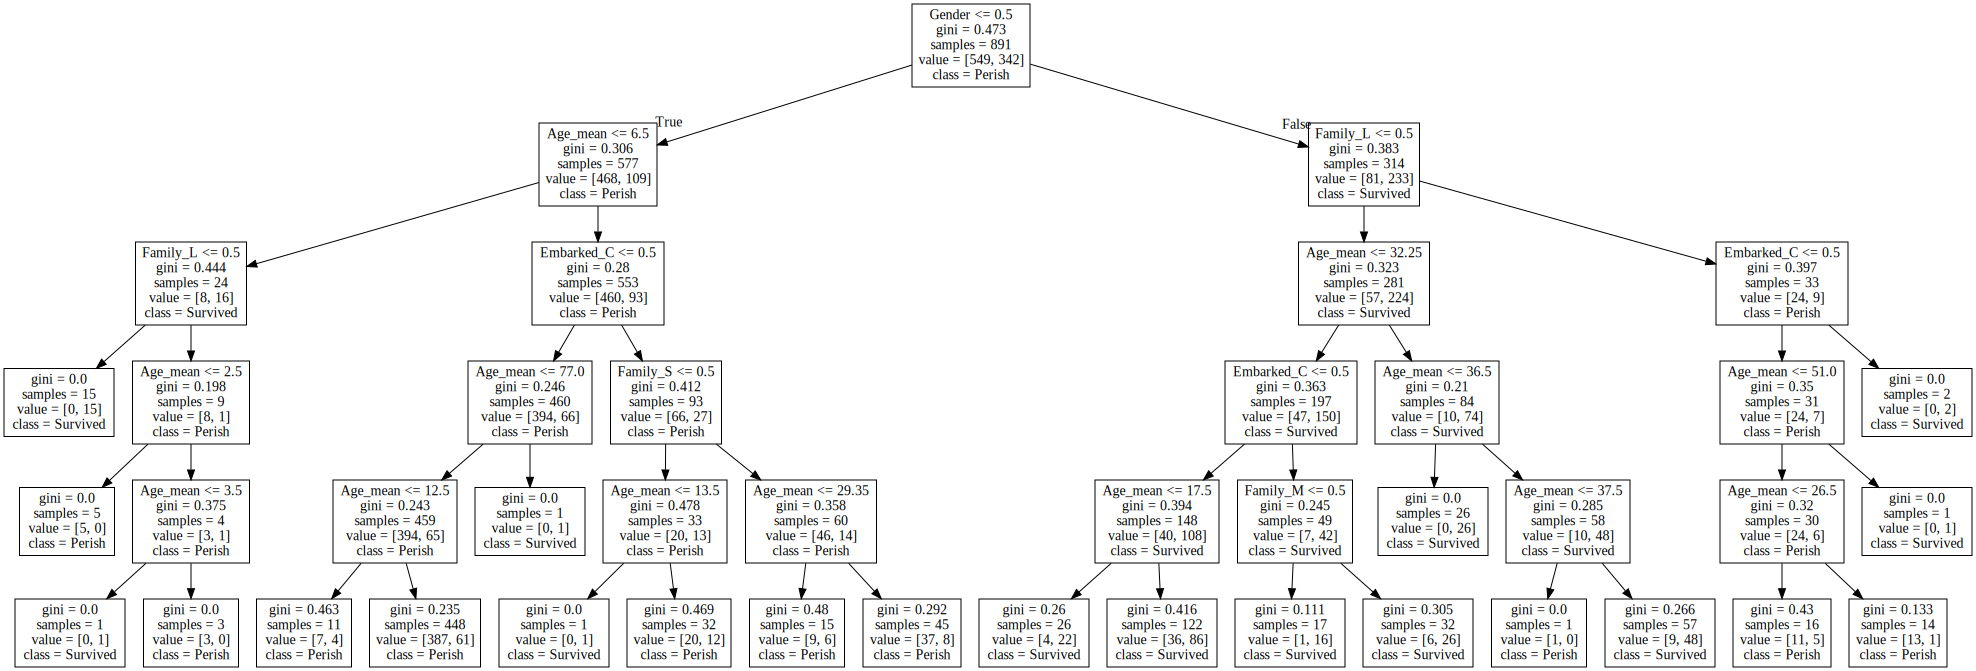

In [70]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model,
                feature_names=feature_names,
                class_names=["Perish", "Survived"],
                out_file="decision-tree.dot")

with open("decision-tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

In [96]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=3, random_state=2018)
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2018,
            splitter='best')

In [97]:
model.fit(x_train, y_label)
# prediction = model.predict(x_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2018,
            splitter='best')

In [98]:
test['Gender'] = (test['Sex'] == 'female')
x_test = test[feature_names]


prediction = model.predict(x_test)
prediction[:10]

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

In [99]:
test['Survived'] = prediction

In [100]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_mean', 'Embarked_S',
       'Embarked_C', 'Embarked_Q', 'FamilySize', 'Family', 'Family_S',
       'Family_M', 'Family_L', 'Gender', 'Survived'],
      dtype='object')

In [101]:
submission = test[['PassengerId','Survived']]
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [81]:
submission.to_csv("submission_ML.csv", index=False)

pd.read_csv("submission_ML.csv").head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [120]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=9, shuffle=True, random_state=2018)

In [121]:
scoring = 'accuracy'
score = cross_val_score(model, x_train, y_label, cv=k_fold, n_jobs=-1, scoring=scoring)
print(score)

[0.83838384 0.86868687 0.87878788 0.81818182 0.80808081 0.83838384
 0.78787879 0.71717172 0.82828283]


In [122]:
round(np.mean(score)*100, 2)

82.04

In [86]:
prediction = model.predict(x_test)

In [87]:
prediction

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,